## scratch functions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


def initialize_centroids(X, K):
    # Randomly select K data points as initial centroids
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]
    return centroids

def assign_clusters(X, centroids):
    # Assign each data point to the nearest centroid
    clusters = []
    for x in X:
        distances = [np.linalg.norm(x - centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Find the index of the nearest centroid
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, K):
    # Calculate new centroids as the mean of all points in each cluster
    new_centroids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        new_centroid = cluster_points.mean(axis=0) if len(cluster_points) > 0 else np.random.randn(X.shape[1])
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def kmeans(X, K, max_iters=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        clusters = assign_clusters(X, centroids)
        
        # Step 3: Update centroids based on the current cluster assignments
        new_centroids = update_centroids(X, clusters, K)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


def error_rate(y_true, y_pred):
    incorrect = np.sum(y_true != y_pred)  # Count incorrect predictions
    print(incorrect)
    total = len(y_true)
    print(total)                   # Total predictions
    return incorrect / total  

## importing data


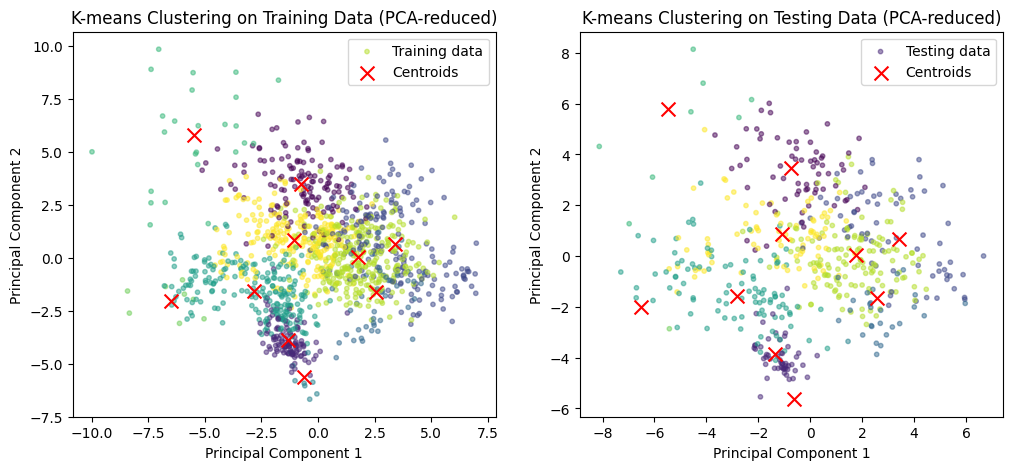

In [2]:


# Load and preprocess the digits dataset
digits = datasets.load_digits()
X = scale(digits.data)
y = digits.target  # Ground truth labels
K = 10  # 10 digits in dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run K-means clustering on the training data
centroids, train_clusters = kmeans(X_train, K)

# Predict clusters for the training and testing sets
train_pred = assign_clusters(X_train, centroids)
test_pred = assign_clusters(X_test, centroids)

# Reduce dimensions for visualization using PCA
pca = PCA(2)
X_reduced = pca.fit_transform(X)
centroids_reduced = pca.transform(centroids)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

# Plot training clusters and centroids
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=train_pred, cmap='viridis', s=10, alpha=0.5, label="Training data")
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title("K-means Clustering on Training Data (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Plot testing clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=test_pred, cmap='viridis', s=10, alpha=0.5, label="Testing data")
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title("K-means Clustering on Testing Data (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.show()


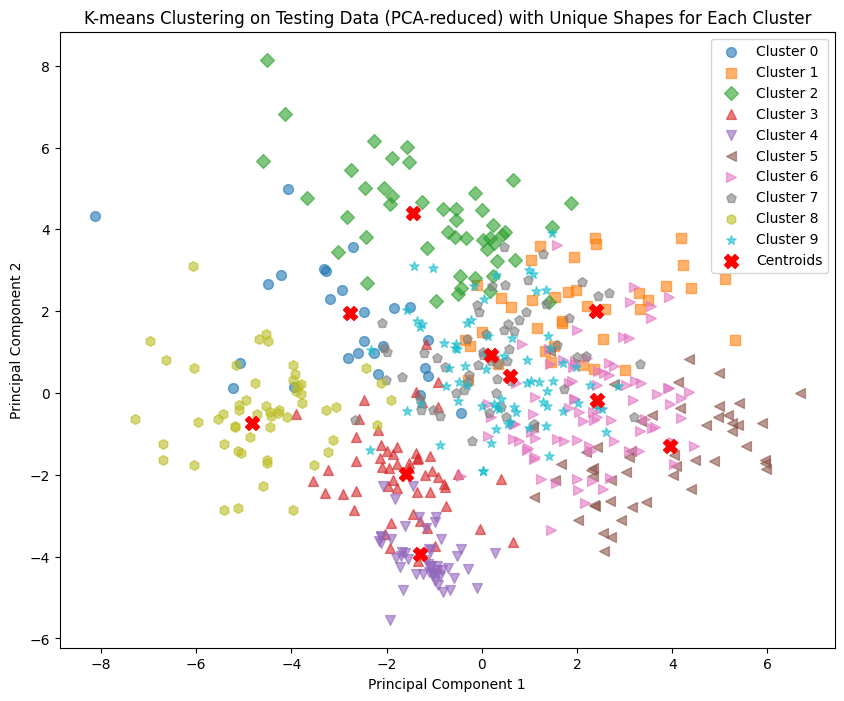

519
540
Error rate: 0.96


In [11]:

test_clusters = assign_clusters(X_test, centroids)
# Define marker styles for each cluster
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '*']  # 10 different marker shapes for clusters

# Plot testing clusters and centroids
plt.figure(figsize=(10, 8))
for cluster_id in range(K):
    cluster_points = X_test_reduced[test_clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=marker_styles[cluster_id], s=50,
                alpha=0.6, label=f"Cluster {cluster_id}")

# Plot centroids with a distinct color and marker
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], color='red', marker='X', s=100, label="Centroids")
plt.title("K-means Clustering on Testing Data (PCA-reduced) with Unique Shapes for Each Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

error = error_rate(y_test, test_clusters)
print(f"Error rate: {error:.2f}")

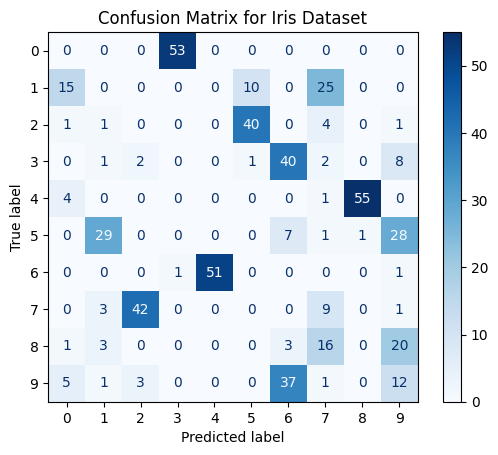

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, test_clusters)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(K))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Dataset')
plt.show()